In [77]:
import scipy, numpy
# complete namespace of NumPy is accessible via SciPy. hence NumPy's machinery can be accessed via SciPy Namespace.

scipy.dot is numpy.dot

True

In [78]:
import scipy as sp
#Load data from a text file, with missing values handled as specified.
data = sp.genfromtxt("data/web_traffic.tsv", "\t")

print(data[:10])

print(data.shape)

#http://www.scipy.org/Tentative_NumPy_Tutorial  For more function about indexing, slicing and iterating.

[[   1 2272]
 [   2   -1]
 [   3 1386]
 [   4 1365]
 [   5 1488]
 [   6 1337]
 [   7 1883]
 [   8 2283]
 [   9 1335]
 [  10 1025]]
(743, 2)


In [79]:
x = data[:,0]
y = data[:,1]

In [80]:
sp.sum(y == -1) # -1 or nan

8

In [81]:
x = x[y != -1]
y = y[y != -1]
print(x.shape)
print(y.shape)

(735,)
(735,)


In [82]:
#plot more at http://matplotlib.org/users/pyplot_tutorial.html)
import matplotlib.pyplot as plt

In [83]:
# Modelling the above data


# define the error function first. Let's use Squared Error function.. 
#here f is the model we will use to approximate y.

def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

# let's use polyfit function of scipy to fit our x and y and find model function
# polyfit uses Least squares polynomial fit. degree 1 is a straight line.
#it returns fp1 : Polynomial coefficients.
# residuals , rank, singular_values, and rcond(relative condition number of the fit.)

fp1, res, rank, sv, rcond = sp.polyfit(x,y,1,full=True)



In [84]:
#analyze the params.
print("Model Parameters %s" %fp1)
print("Residual : %s"%res)
# this means best straight line is 2.59*x + 989.02

Model Parameters [   2.59619213  989.02487106]
Residual : [  3.17389767e+08]


In [85]:
#let's find model function.
f1 = sp.poly1d(fp1)

print (error(f1, x, y))

317389767.34


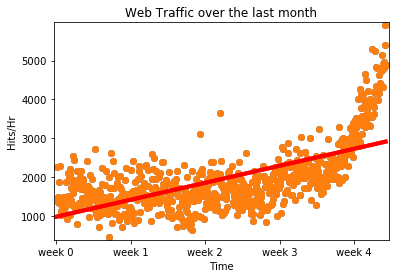

In [91]:
#Return evenly spaced numbers over a specified interval. x[-1] returns number of rows. 
#basically returns 1000 numbers between 0 and 735
fx = sp.linspace(0, x[-1], 1000)
plt.scatter(x,y)  # scatter plot
plt.title("Web Traffic over the last month")  # title
plt.xlabel("Time")  #label for x - axis
plt.ylabel("Hits/Hr")  # label for y - axis

#Get or set the x-limits of the current tick locations and labels.
plt.xticks([w*7*24 for w in range(10)],['week %i' %w for w in range(10)])
plt.autoscale(tight = True)

plt.plot(fx, f1(fx), linewidth=4, color="red") # plot these 1000 points with the corresponding y values.
#plt.legend(["d=%i" % f1.order], loc="upper left")
plt.grid()

plt.show()

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
179983507.878


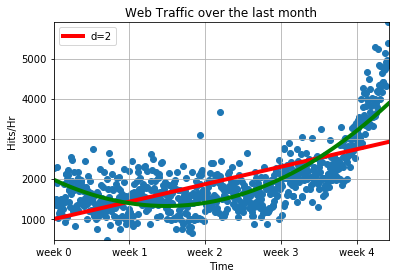

In [92]:
# Lets try to plot in 2nd degree polynomial
fp2 = sp.polyfit(x,y,2)
print(fp2)
f2 = sp.poly1d(fp2)  # create model function

print (error(f2, x, y))  # compare the error of f1 with f2/

# here fx = 0.00105*x**2 - 5.265 *x + 1974.76

fx = sp.linspace(0, x[-1], 1000)
plt.scatter(x,y)  # scatter plot
plt.title("Web Traffic over the last month")  # title
plt.xlabel("Time")  #label for x - axis
plt.ylabel("Hits/Hr")  # label for y - axis

#Get or set the x-limits of the current tick locations and labels.
plt.xticks([w*7*24 for w in range(10)],['week %i' %w for w in range(10)])
plt.autoscale(tight = True)

plt.plot(fx, f1(fx), linewidth=4, color="red") # plot these 1000 points with the corresponding y values.
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.plot(fx, f2(fx), linewidth=4, color="green")
plt.legend(["d=%i" % f2.order], loc="upper left")

plt.grid()

plt.show()

# Green looks better.